<a href="https://colab.research.google.com/github/fidafebin/fida-febin.k/blob/main/Multi_Linear_Regression_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving ToyotaCorolla.csv to ToyotaCorolla.csv


In [ ]:
Toyota=pd.read_csv("ToyotaCorolla.csv",encoding='unicode_escape')

In [ ]:
Toyota

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


##Taking only the required columns

In [ ]:
Toyota_mod=Toyota.loc[:,["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [ ]:
Toyota_mod

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


##Checking for null values

In [ ]:
Toyota_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


There are no null values in the data

##Checking for duplicates

In [ ]:
Toyota_mod[Toyota_mod.duplicated()]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


##Removing duplicates

In [ ]:
Toyota_mod.drop_duplicates(inplace=True)

##Checking correlation and Pairplots

In [ ]:
Toyota_mod.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age_08_04,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Quarterly_Tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


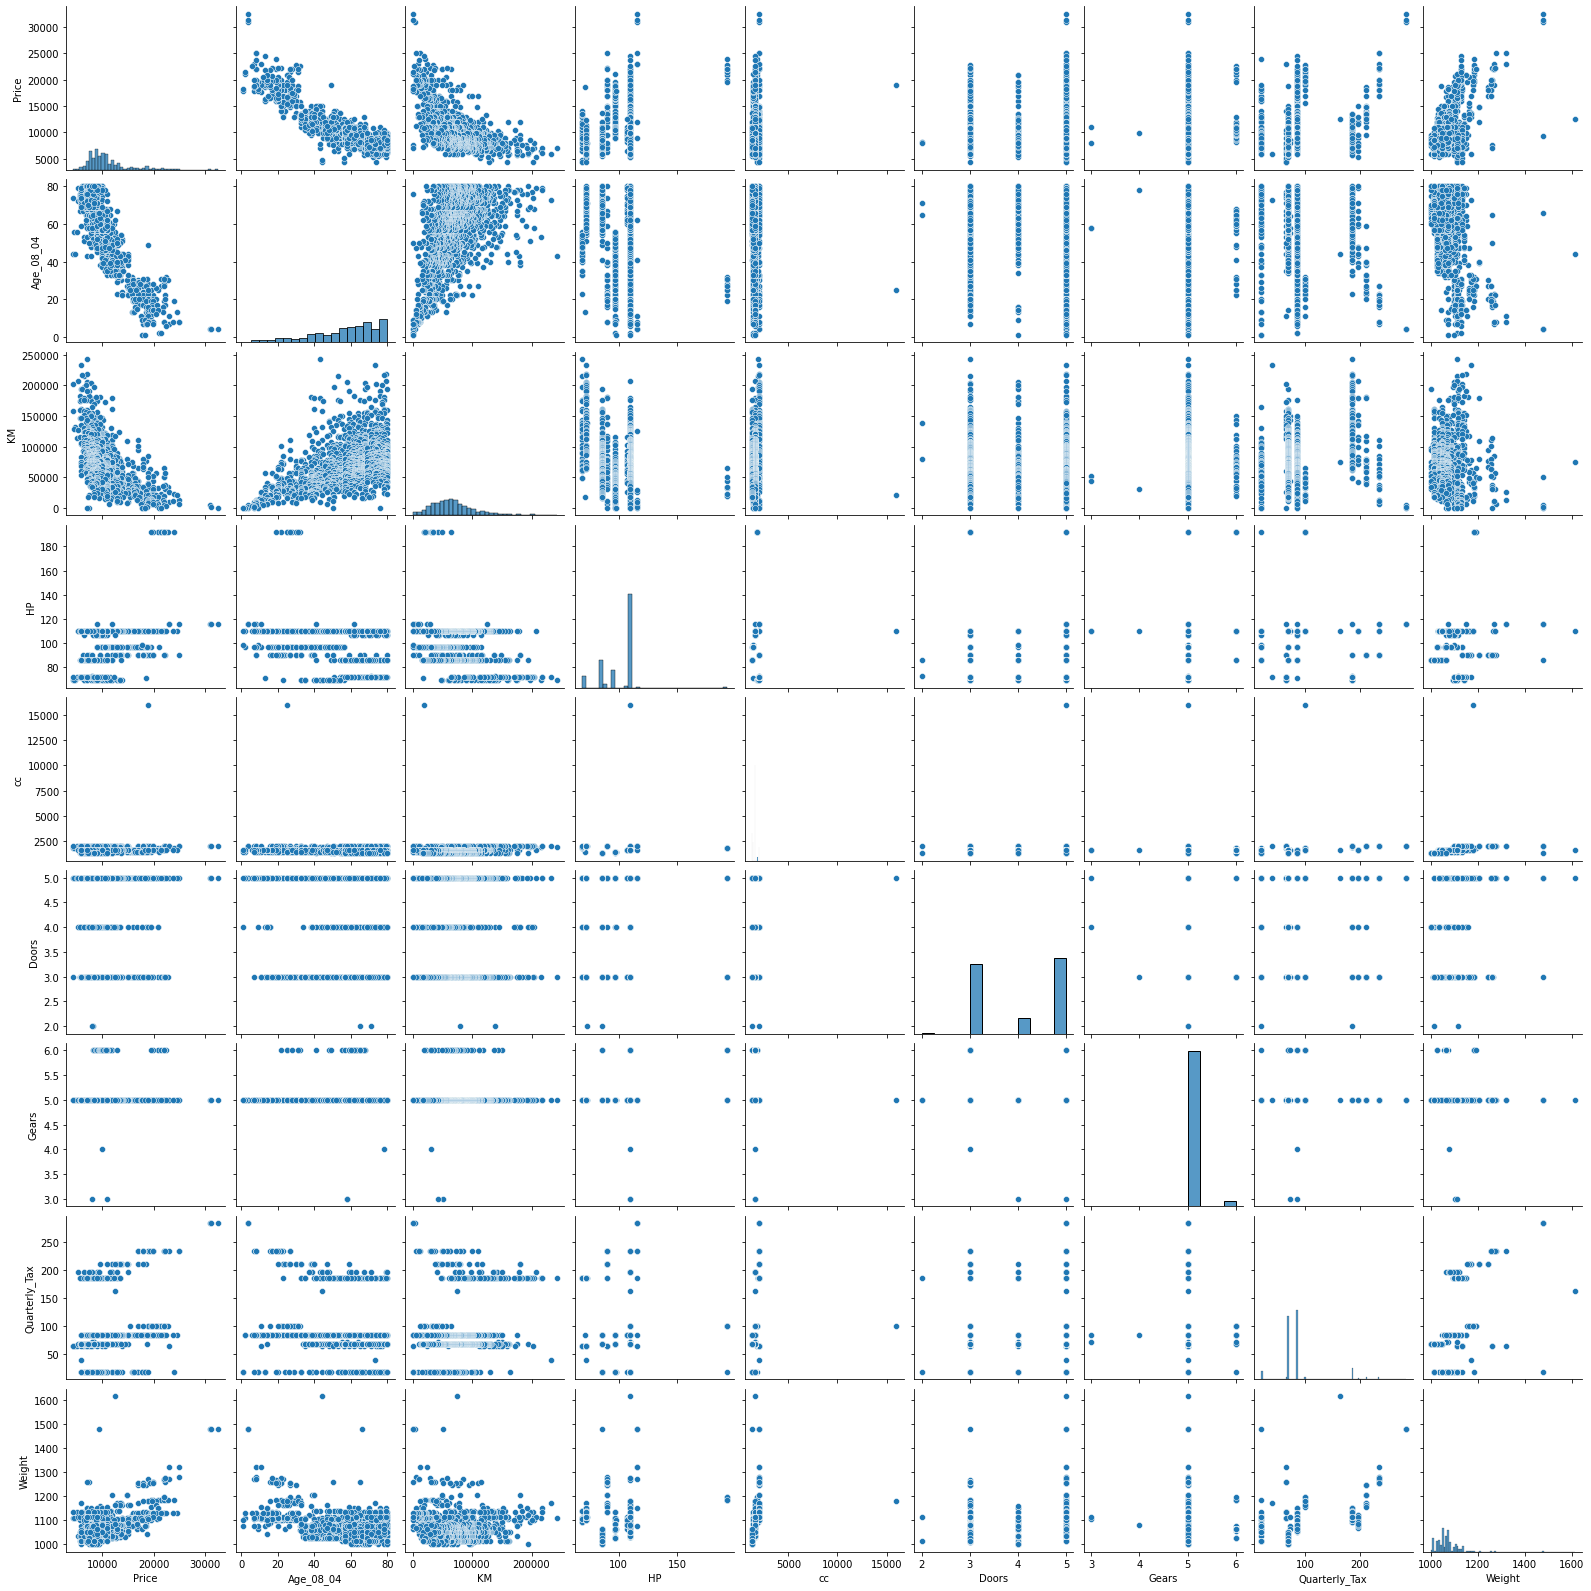

In [ ]:
sns.pairplot(Toyota_mod)

##Checking for outliers

In [ ]:
Toyota_mod.Gears.value_counts()

5    1389
6      43
3       2
4       1
Name: Gears, dtype: int64

In [ ]:
toyota_mod1=Toyota_mod.copy()

##There are only very few data for 3 and 4 gears so removing them

In [ ]:
toyota_mod1=toyota_mod1[(toyota_mod1.Gears!=3)&(toyota_mod1.Gears!=4)]

In [ ]:
toyota_mod1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
toyota_mod1.Doors.value_counts()

5    672
3    621
4    137
2      2
Name: Doors, dtype: int64

##only two data points exist for 2 door so removing them

In [ ]:
toyota_mod1=toyota_mod1[toyota_mod1.Doors!=2]
toyota_mod1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


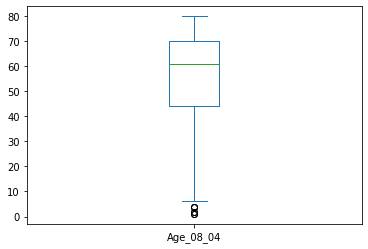

In [ ]:
toyota_mod1.Age_08_04.plot(kind='box')

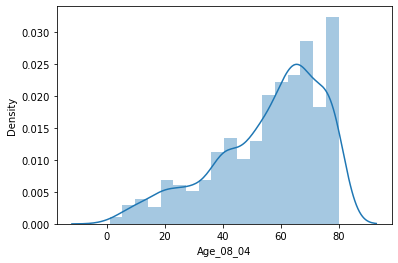

In [ ]:
sns.distplot(toyota_mod1.Age_08_04)

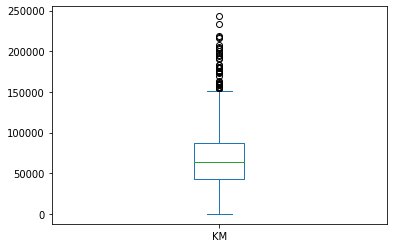

In [ ]:
toyota_mod1.KM.plot(kind='box')

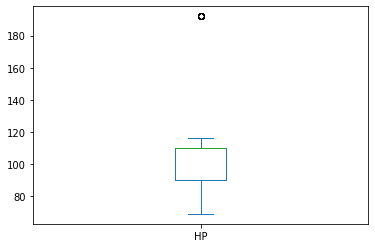

In [ ]:
toyota_mod1.HP.plot(kind='box')

In [ ]:
toyota_mod1[toyota_mod1.HP>180]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
8,21500,27,19700,192,1800,3,5,100,1185
10,20950,25,31461,192,1800,3,6,100,1185
11,19950,22,43610,192,1800,3,6,100,1185
12,19600,25,32189,192,1800,3,6,100,1185
13,21500,31,23000,192,1800,3,6,100,1185
14,22500,32,34131,192,1800,3,6,100,1185
15,22000,28,18739,192,1800,3,6,100,1185
16,22750,30,34000,192,1800,3,5,100,1185
49,21950,31,64982,192,1800,5,6,100,1195
53,21950,27,49866,192,1800,5,5,100,1195


In [ ]:
toyota_mod1[toyota_mod1.HP>180].index

Int64Index([8, 10, 11, 12, 13, 14, 15, 16, 49, 53, 141], dtype='int64')

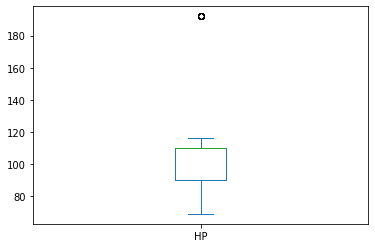

In [ ]:
toyota_mod1.HP.plot(kind='box')

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


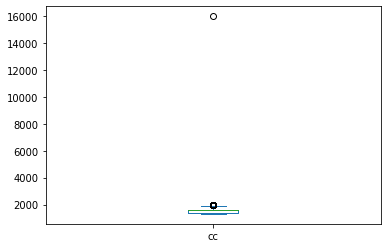

In [ ]:
toyota_mod1.cc.plot(kind='box')
toyota_mod1[toyota_mod1.cc>14000]

##Removing the outlier

In [ ]:
m=toyota_mod1[toyota_mod1.cc<14000].cc.max()
m

2000

In [ ]:
toyota_mod1.loc[80,'cc']=2000

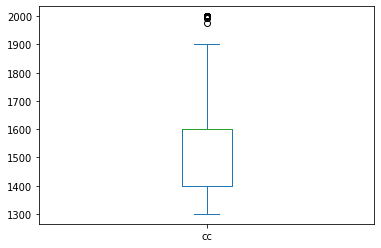

In [ ]:
toyota_mod1.cc.plot(kind='box')

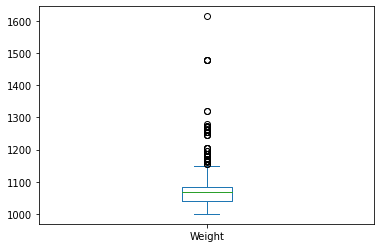

In [ ]:
toyota_mod1.Weight.plot(kind='box')

##Removing the outliers for weight column


In [35]:
toyota_mod1[toyota_mod1.Weight>1400].index

Int64Index([109, 110, 111, 221, 960], dtype='int64')

In [36]:
toyota_mod1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [38]:
toyota_mod1.loc[[109, 110, 111, 221, 960],'Weight']=1320

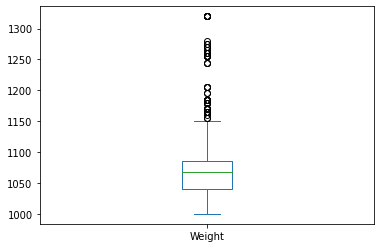

In [39]:
toyota_mod1.Weight.plot(kind='box')

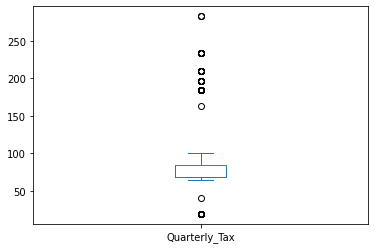

In [40]:
toyota_mod1.Quarterly_Tax.plot(kind='box')

In [41]:
toyota_mod1[toyota_mod1.Quarterly_Tax>250]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
109,32500,4,1,116,2000,5,5,283,1320
110,31000,4,4000,116,2000,5,5,283,1320
111,31275,4,1500,116,2000,5,5,283,1320


In [42]:
toyota_mod1.loc[[109,110,111],'Quarterly_Tax']=toyota_mod1[toyota_mod1.Quarterly_Tax<250].Quarterly_Tax.max()

In [43]:
toyota_mod1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


##Getting dummy columns

In [44]:
toyota_mod2=pd.get_dummies(toyota_mod1,columns=['Doors','Gears'])

In [46]:
toyota_mod2

,Price,Age_08_04,KM,HP,cc,Quarterly_Tax,Weight,Doors_3,Doors_4,Doors_5,Gears_5,Gears_6
0,13500,23,46986,90,2000,210,1165,1,0,0,1,0
1,13750,23,72937,90,2000,210,1165,1,0,0,1,0
2,13950,24,41711,90,2000,210,1165,1,0,0,1,0
3,14950,26,48000,90,2000,210,1165,1,0,0,1,0
4,13750,30,38500,90,2000,210,1170,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,69,1025,1,0,0,1,0
1432,10845,72,19000,86,1300,69,1015,1,0,0,1,0
1433,8500,71,17016,86,1300,69,1015,1,0,0,1,0
1434,7250,70,16916,86,1300,69,1015,1,0,0,1,0


In [47]:
model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+Quarterly_Tax+Weight',data=toyota_mod2).fit()

In [48]:
model.rsquared

0.8737077695010331

In [49]:
np.sqrt(model.mse_resid)

1287.9993754482873

In [50]:
model.pvalues

Intercept         2.385333e-16
Age_08_04        1.350789e-266
KM                9.013629e-43
HP                1.843648e-38
cc                6.156415e-27
Doors_3           1.581477e-17
Doors_4           1.004016e-11
Doors_5           5.163798e-17
Gears_5           1.229370e-18
Gears_6           1.943866e-12
Quarterly_Tax     4.246127e-07
Weight            1.996737e-81
dtype: float64

Residual analysis

##Test for normality of residuals

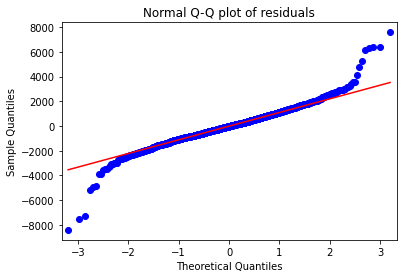

In [51]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

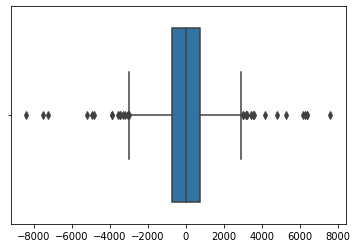

In [52]:
sns.boxplot(model.resid)

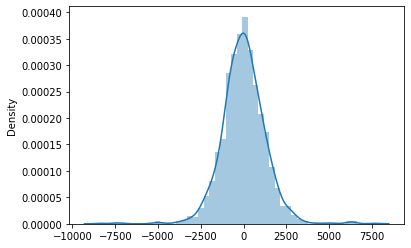

In [53]:
sns.distplot(model.resid)

In [54]:
def get_standardized_values(vals):
    return (vals - vals.mean())/vals.std()

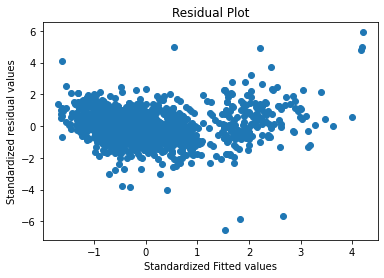

In [55]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

##Checking vif values

In [57]:
rsq_age = smf.ols('Age_08_04~KM+HP+cc+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+Quarterly_Tax+Weight',data=toyota_mod2).fit().rsquared  
vif_age = 1/(1-rsq_age)

rsq_km = smf.ols('KM~Age_08_04+HP+cc+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+Quarterly_Tax+Weight',data=toyota_mod2).fit().rsquared  
vif_km = 1/(1-rsq_km)

rsq_hp = smf.ols('HP~Age_08_04+KM+cc+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+Quarterly_Tax+Weight',data=toyota_mod2).fit().rsquared  
vif_hp = 1/(1-rsq_hp)

rsq_cc = smf.ols('cc~Age_08_04+KM+HP+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+Quarterly_Tax+Weight',data=toyota_mod2).fit().rsquared  
vif_cc = 1/(1-rsq_cc)

rsq_qt = smf.ols('Quarterly_Tax~Age_08_04+KM+HP+cc+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+Weight',data=toyota_mod2).fit().rsquared  
vif_qt = 1/(1-rsq_qt)

rsq_wt = smf.ols('Weight~Age_08_04+KM+HP+cc+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+Quarterly_Tax',data=toyota_mod2).fit().rsquared  
vif_wt = 1/(1-rsq_wt)


# Storing vif values in a data frame
d1 = {'Variables':['age','km','hp','cc','qt','wt'],'VIF':[vif_age,vif_km,vif_hp,vif_cc,vif_qt,vif_wt]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,age,2.027431
1,km,1.905860
2,hp,1.611265
3,cc,3.209178
4,qt,2.833125
5,wt,3.855025


##REmoving data points with high cook's distance

In [60]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance
k = 8
n = 1430
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff
toyota_mod2['c']=c
toyota_mod2=toyota_mod2[toyota_mod2.c<leverage_cutoff]

##Improving the model

In [61]:
model2=smf.ols('Price~Age_08_04+KM+HP+cc+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+Quarterly_Tax+Weight',data=toyota_mod2).fit()

In [62]:
model2.rsquared

0.8921011791716871

In [63]:
np.sqrt(model2.mse_resid)

1146.7900140909708

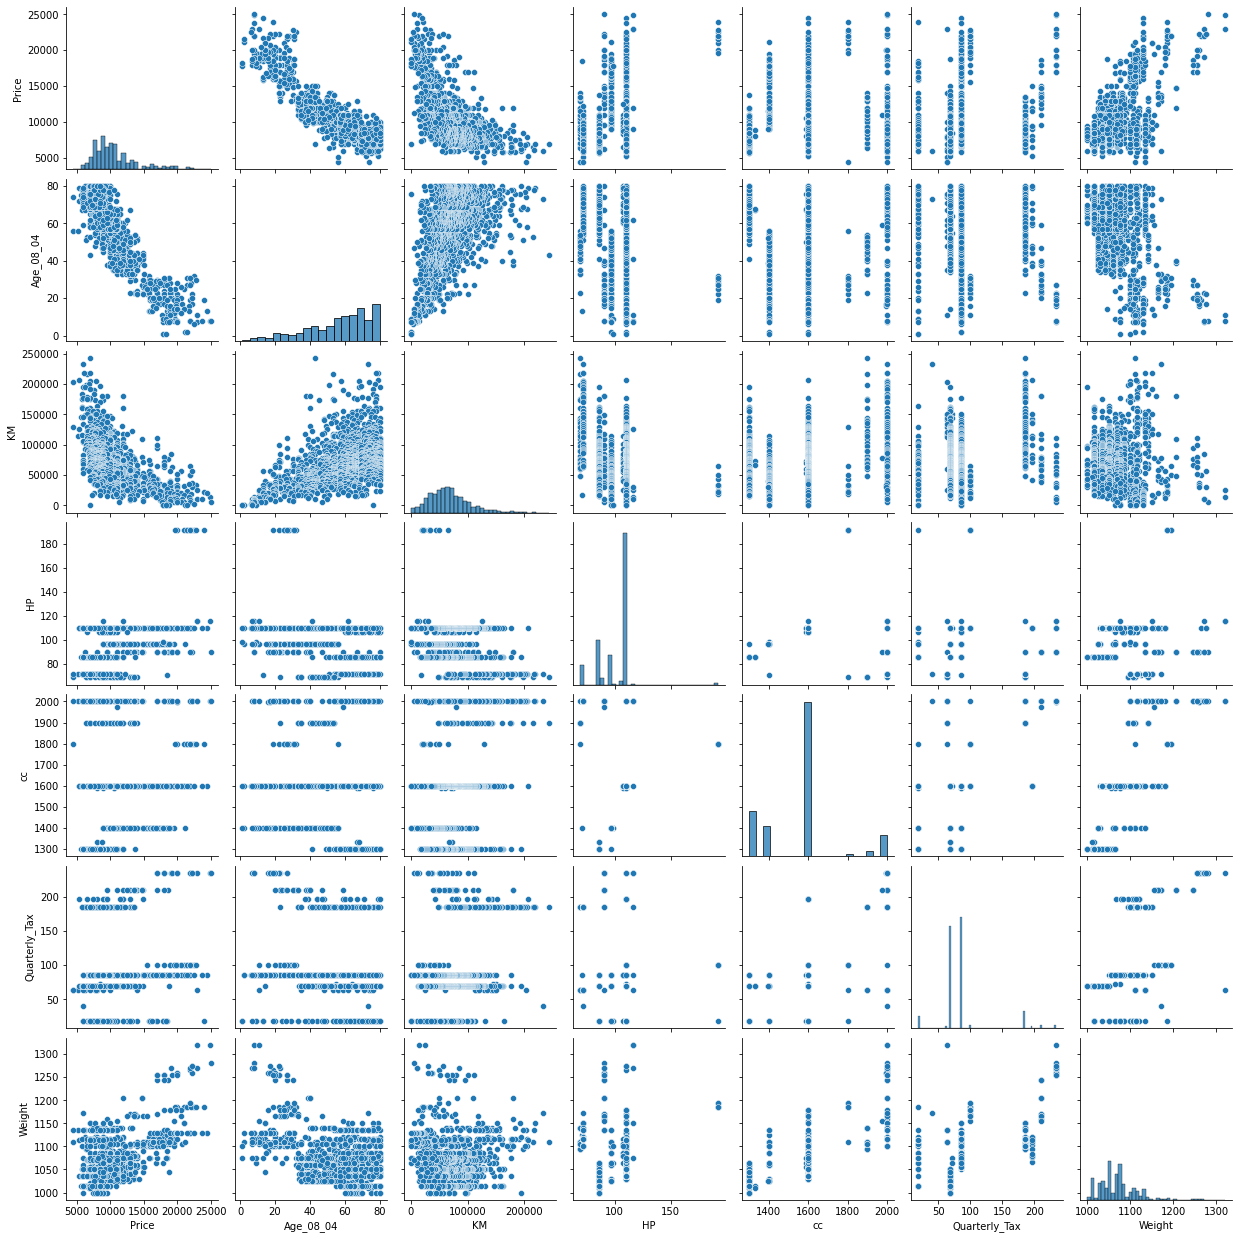

In [64]:
sns.pairplot(toyota_mod2.iloc[:,:7])

##Typing different transformations for the age column

In [65]:
toyota_mod2['age_sq']=toyota_mod2.Age_08_04**2
toyota_mod2['age_sqrt']=toyota_mod2.Age_08_04**0.5
toyota_mod2['age_log']=np.log(toyota_mod2.Age_08_04)

,Price,Age_08_04,age_sq,age_sqrt,age_log
Price,1.000000,-0.887835,-0.829394,-0.901474,-0.873178
Age_08_04,-0.887835,1.000000,0.978570,0.988852,0.933225
age_sq,-0.829394,0.978570,1.000000,0.939029,0.851679
age_sqrt,-0.901474,0.988852,0.939029,1.000000,0.974773
age_log,-0.873178,0.933225,0.851679,0.974773,1.000000


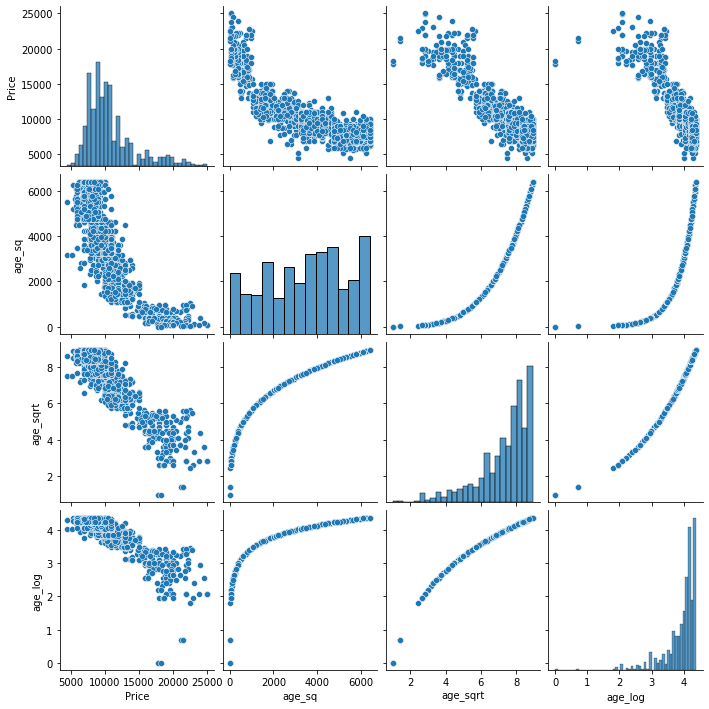

In [66]:
sns.pairplot(toyota_mod2.loc[:,['Price','age_sq','age_sqrt','age_log']])
toyota_mod2.loc[:,['Price','Age_08_04','age_sq','age_sqrt','age_log']].corr()

##sqrt has a good linearity and correlation creating a model with that transformation

In [67]:
model3=smf.ols('Price~age_sqrt+KM+HP+cc+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+Quarterly_Tax+Weight',data=toyota_mod2).fit()

In [68]:
model3.rsquared

0.8983089374084283

In [69]:
np.sqrt(model3.mse_resid)

1113.3121430834906

In [70]:
model3.pvalues

Intercept         4.235262e-05
age_sqrt         7.907197e-300
KM                2.208898e-45
HP                1.591800e-39
cc                2.557393e-28
Doors_3           2.376168e-05
Doors_4           2.449067e-03
Doors_5           3.243711e-06
Gears_5           1.524605e-06
Gears_6           1.229700e-03
Quarterly_Tax     1.691376e-04
Weight            4.292717e-74
dtype: float64

This model has higher rsquared value and less error

##Trying transformations for km column

,Price,KM,km_sq,km_sqrt,km_log
Price,1.000000,-0.572547,-0.442074,-0.634022,-0.518974
KM,-0.572547,1.000000,0.944371,0.972306,0.669495
km_sq,-0.442074,0.944371,1.000000,0.852185,0.515382
km_sqrt,-0.634022,0.972306,0.852185,1.000000,0.789592
km_log,-0.518974,0.669495,0.515382,0.789592,1.000000


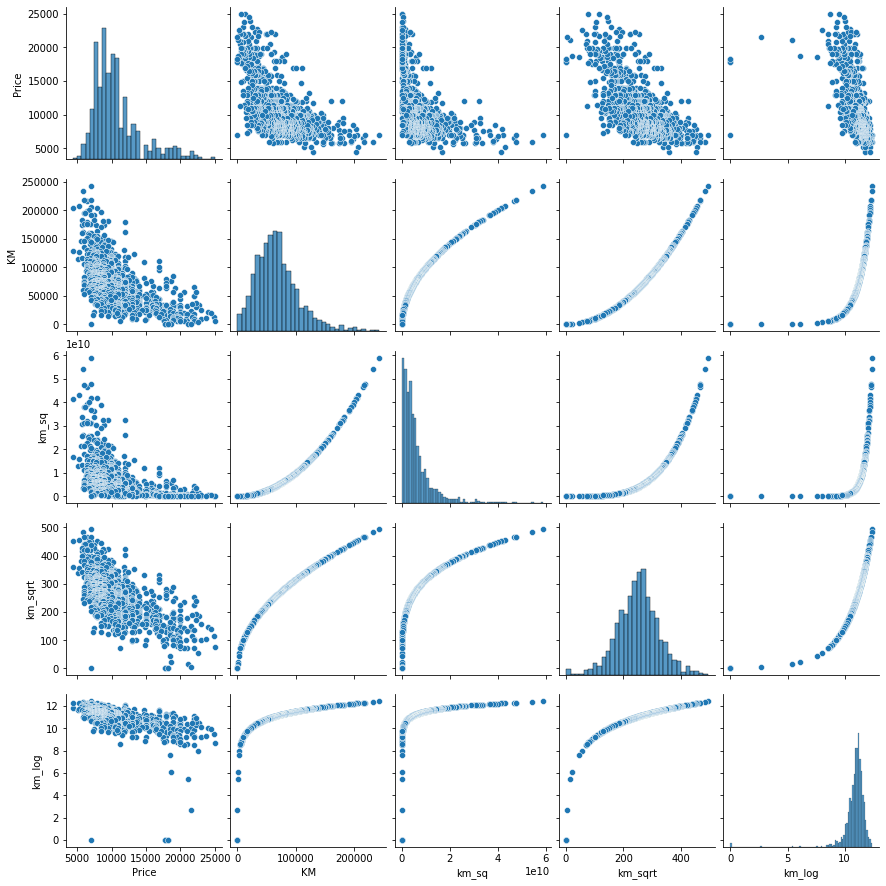

In [72]:
toyota_mod2['km_sq']=toyota_mod2.KM**2
toyota_mod2['km_sqrt']=toyota_mod2.KM**0.5
toyota_mod2['km_log']=np.log(toyota_mod2.KM)
sns.pairplot(toyota_mod2.loc[:,['Price','KM','km_sq','km_sqrt','km_log']])
toyota_mod2.loc[:,['Price','KM','km_sq','km_sqrt','km_log']].corr()

,Price,KM,km_sqrt,km_sqrt4,km_sqrt3,km_sqrt2
Price,1.000000,-0.572547,-0.634022,-0.641531,-0.643339,-0.632986
KM,-0.572547,1.000000,0.972306,0.954997,0.927892,0.882445
km_sqrt,-0.634022,0.972306,1.000000,0.997601,0.987634,0.961968
km_sqrt4,-0.641531,0.954997,0.997601,1.000000,0.996062,0.978131
km_sqrt3,-0.643339,0.927892,0.987634,0.996062,1.000000,0.992618
km_sqrt2,-0.632986,0.882445,0.961968,0.978131,0.992618,1.000000


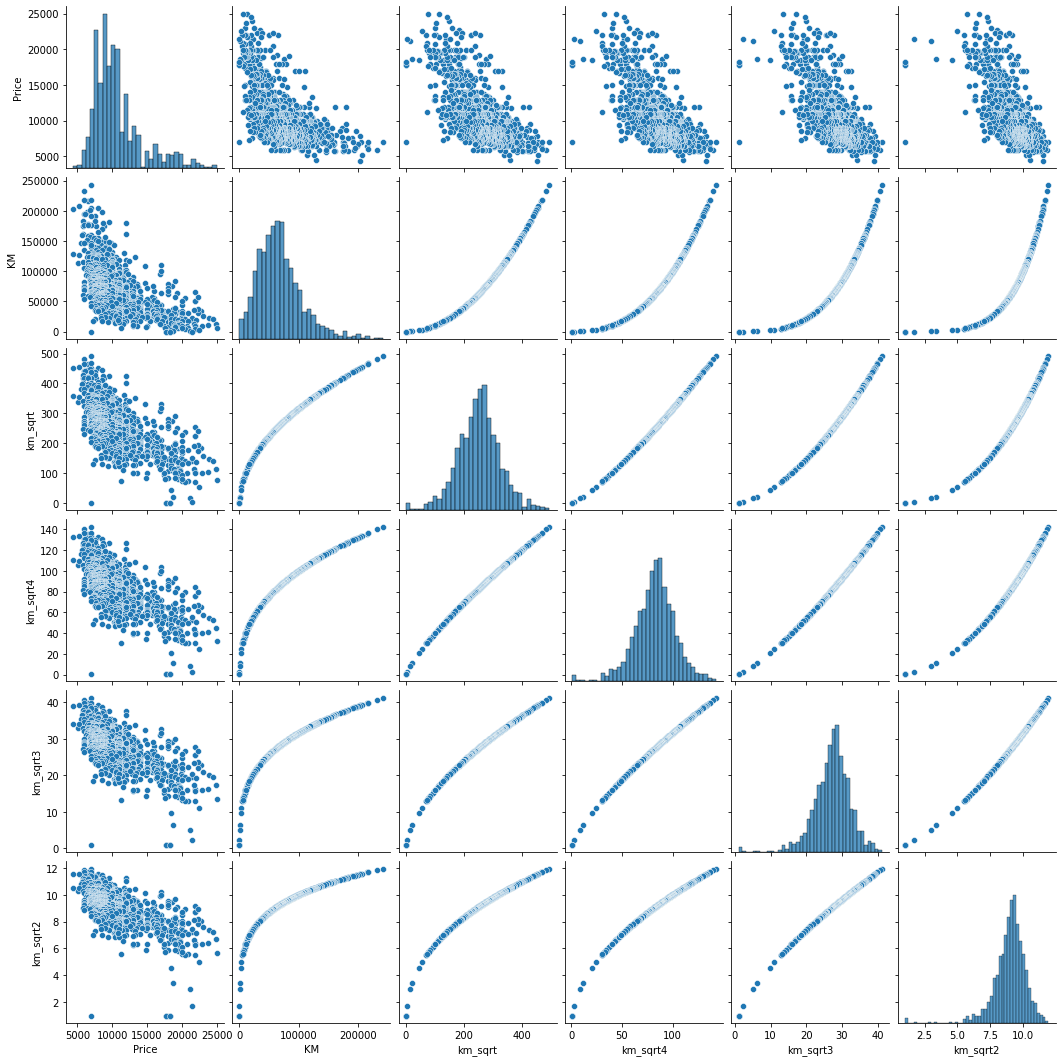

In [73]:
toyota_mod2['km_sqrt4']=toyota_mod2.KM**0.4
toyota_mod2['km_sqrt3']=toyota_mod2.KM**0.3
toyota_mod2['km_sqrt2']=toyota_mod2.KM**0.2

sns.pairplot(toyota_mod2.loc[:,['Price','KM','km_sqrt','km_sqrt4','km_sqrt3','km_sqrt2']])
toyota_mod2.loc[:,['Price','KM','km_sqrt','km_sqrt4','km_sqrt3','km_sqrt2']].corr()

In [74]:
model4=smf.ols('Price~age_sqrt+km_sqrt+HP+cc+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+Quarterly_Tax+Weight',data=toyota_mod2).fit()
model4_sqrt4=smf.ols('Price~age_sqrt+km_sqrt4+HP+cc+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+Quarterly_Tax+Weight',data=toyota_mod2).fit()
model4_sqrt3=smf.ols('Price~age_sqrt+km_sqrt3+HP+cc+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+Quarterly_Tax+Weight',data=toyota_mod2).fit()
model4_sqrt2=smf.ols('Price~age_sqrt+km_sqrt2+HP+cc+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+Quarterly_Tax+Weight',data=toyota_mod2).fit()

In [75]:
print(model4.rsquared,model4_sqrt4.rsquared,model4_sqrt3.rsquared,model4_sqrt2.rsquared,sep='\n')
print(np.sqrt(model4.mse_resid),np.sqrt(model4_sqrt4.mse_resid),np.sqrt(model4_sqrt3.mse_resid),np.sqrt(model4_sqrt2.mse_resid))

0.8957611515464539
0.894318476755435
0.892192706535993
0.8892024286467148
1127.17242529037 1134.9457045327922 1146.3035169484615 1162.0924343331922


In [76]:
model4.rsquared

0.8957611515464539

In [77]:
print(np.sqrt(model4.mse_resid),np.sqrt(model4_sqrt4.mse_resid),np.sqrt(model4_sqrt3.mse_resid),np.sqrt(model4_sqrt2.mse_resid))

1127.17242529037 1134.9457045327922 1146.3035169484615 1162.0924343331922


the untransformed data has a better error

##trying trnsformations for weight column

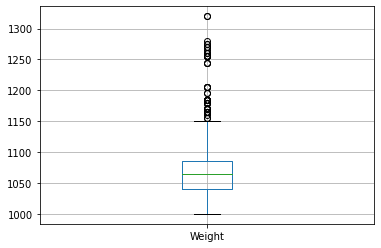

In [78]:
toyota_mod2[['Weight']].boxplot()

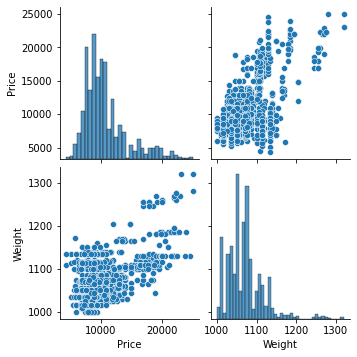

In [79]:
sns.pairplot(toyota_mod2.loc[:,['Price','Weight']])

,Price,Weight,wt_sq,wt_sqrt,wt_log,wt_sq3,wt_sq4
Price,1.000000,0.592539,0.594830,0.591049,0.589348,0.596111,0.596282
Weight,0.592539,1.000000,0.999186,0.999806,0.999240,0.996643,0.992241
wt_sq,0.594830,0.999186,1.000000,0.998199,0.996855,0.999134,0.996444
wt_sqrt,0.591049,0.999806,0.998199,1.000000,0.999813,0.994843,0.989612
wt_log,0.589348,0.999240,0.996855,0.999813,1.000000,0.992702,0.986661
wt_sq3,0.596111,0.996643,0.999134,0.994843,0.992702,1.000000,0.999086
wt_sq4,0.596282,0.992241,0.996444,0.989612,0.986661,0.999086,1.000000


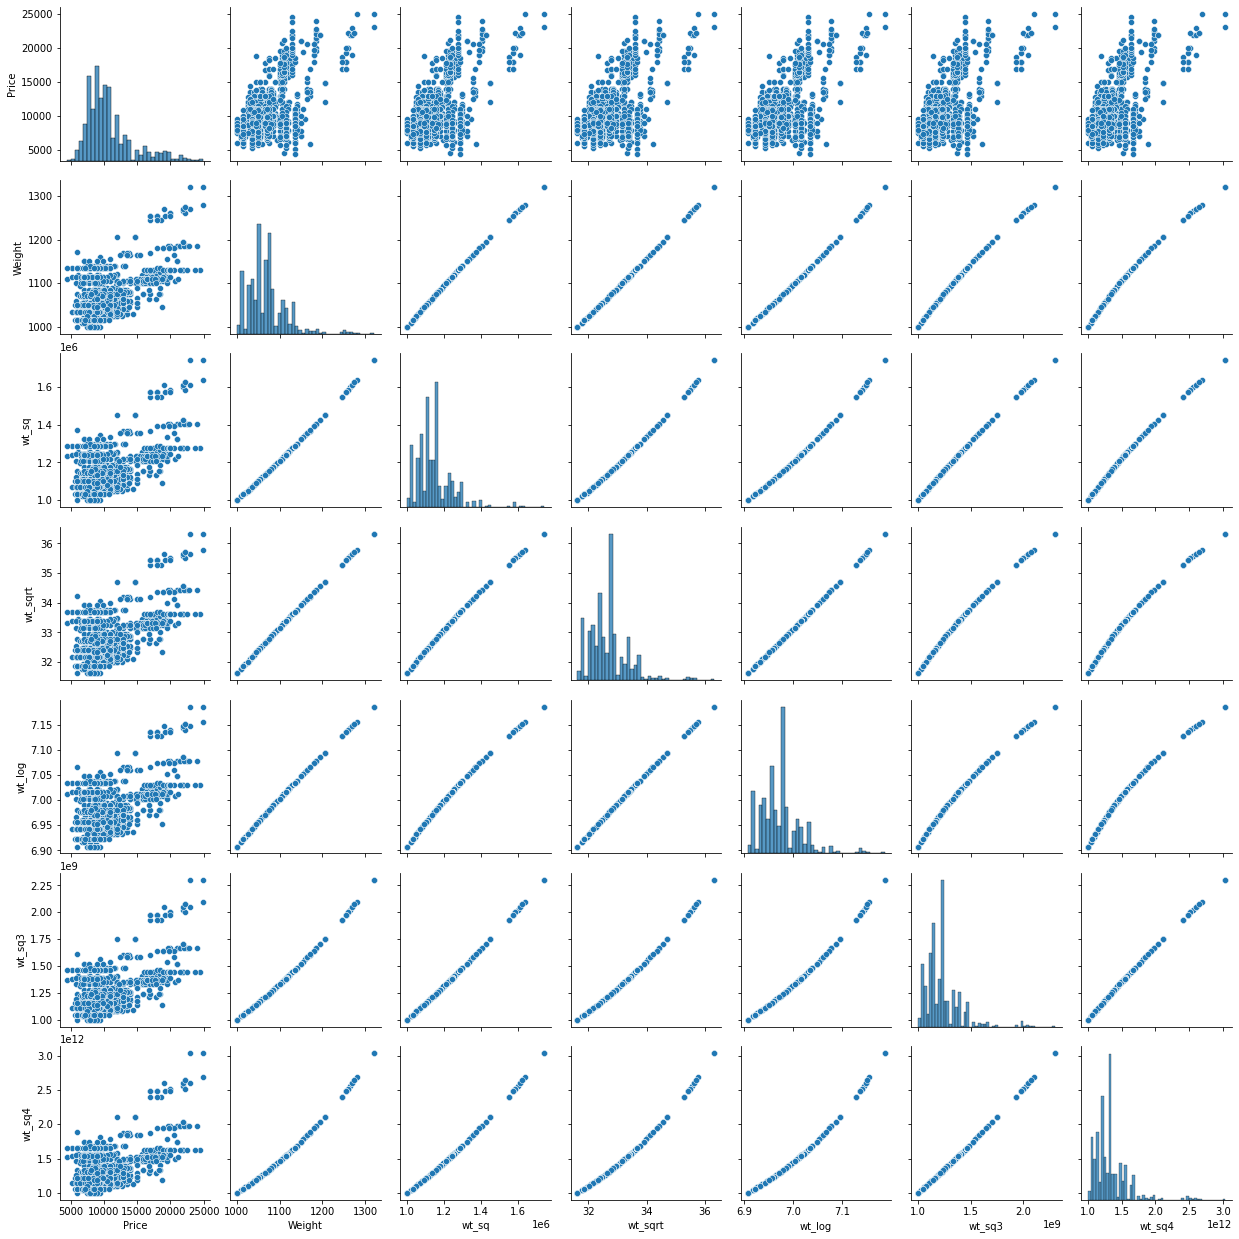

In [80]:
toyota_mod2['wt_sq']=toyota_mod2.Weight**2
toyota_mod2['wt_sqrt']=toyota_mod2.Weight**0.5
toyota_mod2['wt_log']=np.log(toyota_mod2.Weight)
toyota_mod2['wt_sq3']=toyota_mod2.Weight**3
toyota_mod2['wt_sq4']=toyota_mod2.Weight**4
sns.pairplot(toyota_mod2.loc[:,['Price','Weight','wt_sq','wt_sqrt','wt_log','wt_sq3','wt_sq4']])
toyota_mod2.loc[:,['Price','Weight','wt_sq','wt_sqrt','wt_log','wt_sq3','wt_sq4']].corr()

In [81]:
model5_sq=smf.ols('Price~age_sqrt+KM+HP+cc+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+Quarterly_Tax+wt_sq',data=toyota_mod2).fit()
model5_sq3=smf.ols('Price~age_sqrt+KM+HP+cc+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+Quarterly_Tax+wt_sq3',data=toyota_mod2).fit()
model5_sq4=smf.ols('Price~age_sqrt+KM+HP+cc+Doors_3+Doors_4+Doors_5+Gears_5+Gears_6+Quarterly_Tax+wt_sq4',data=toyota_mod2).fit()

In [82]:
print(model4.rsquared,model5_sq.rsquared,model5_sq3.rsquared,model5_sq4.rsquared)

0.8957611515464539 0.8988785397802045 0.8990964297166991 0.8989749773766476


In [83]:
print(np.sqrt(model3.mse_resid),np.sqrt(model4.mse_resid),np.sqrt(model5_sq.mse_resid),np.sqrt(model5_sq3.mse_resid),np.sqrt(model5_sq4.mse_resid))

1113.3121430834906 1127.17242529037 1110.1897657252105 1108.9930384194975 1109.6602561098568


##cubing the weight variable gives the best rsquared and the best error

In [84]:
model5_sq3.params

Intercept        8202.593185
age_sqrt        -1525.958472
KM                 -0.015959
HP                 35.213218
cc                 -3.014630
Doors_3          2690.321377
Doors_4          2985.141586
Doors_5          2527.130223
Gears_5          3830.179042
Gears_6          4372.414144
Quarterly_Tax       4.269218
wt_sq3              0.000007
dtype: float64

In [85]:
model5_sq3.pvalues

Intercept        5.625011e-151
age_sqrt         2.313137e-311
KM                1.251908e-44
HP                4.386726e-40
cc                6.732910e-25
Doors_3          6.507327e-139
Doors_4          7.913505e-124
Doors_5           1.249417e-93
Gears_5          3.335447e-138
Gears_6           3.757351e-99
Quarterly_Tax     1.254030e-03
wt_sq3            1.776853e-76
dtype: float64

In [86]:
model5_sq3.rsquared

0.8990964297166991

In [87]:
np.sqrt(model5_sq3.mse_resid)

1108.9930384194975

##Was only able to get an rsquared value of 0.8990

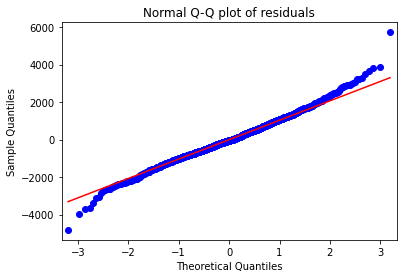

In [88]:
qqplot=sm.qqplot(model5_sq3.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

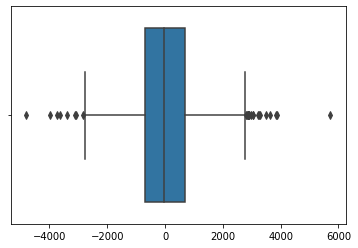

In [89]:
sns.boxplot(model5_sq3.resid)

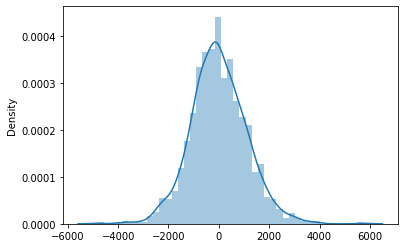

In [90]:
sns.distplot(model5_sq3.resid)

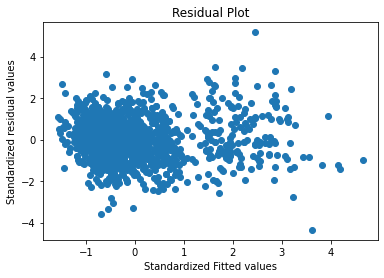

In [91]:
plt.scatter(get_standardized_values(model5_sq3.fittedvalues),
            get_standardized_values(model5_sq3.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

##we take model5_sq3 as the finalised model

In [92]:
model_finalised=model5_sq3

##Predicting for data

In [93]:
new=pd.DataFrame(columns=['Age_08_04', 'KM', 'HP', 'cc', 'Doors_3','Doors_4', 'Doors_5','Gears_5','Gears_6','Quarterly_Tax', 'Weight'])
#new.columns=['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears','Quarterly_Tax', 'Weight']
new.loc[0]=[21,27543,100,1800,0,1,0,1,0,210,1200]
new.loc[1]=[36,57543,120,1900,0,1,0,1,0,240,1000]
new['age_sqrt']=new.Age_08_04**0.5
new['wt_sq3']=new.Weight**3
new

,Age_08_04,KM,HP,cc,Doors_3,Doors_4,Doors_5,Gears_5,Gears_6,Quarterly_Tax,Weight,age_sqrt,wt_sq3
0,21,27543,100,1800,0,1,0,1,0,210,1200,4.582576,1728000000
1,36,57543,120,1900,0,1,0,1,0,240,1000,6.0,1000000000
